# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Importing the dataset

In [2]:
train_dataset = pd.read_csv('/kaggle/input/titanic/train.csv')
test_dataset = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

Y_train = train_dataset.iloc[:, 1:2].values.flatten()
x_train_names = train_dataset.iloc[:, 3:4].values
x_train = train_dataset.drop(columns = ["Survived", "Cabin", "PassengerId", "Name", "Ticket"]).iloc[:, :].values
x_test_ids = test_dataset.iloc[:,0:1].values
x_test_names = test_dataset.iloc[:, 2:3].values
x_test = test_dataset.drop(columns = ["Cabin", "Name", "Ticket"]).iloc[:,1:].values

# Filling of missing data

In [3]:
from sklearn.impute import SimpleImputer

# Filling the age column of x_train

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x_train[:,2:3])
x_train[:,2:3] = imputer.transform(x_train[:,2:3])

#Filling the embarked column of x_train

x_train[:, -1]=['S' if x is np.nan else x for x in x_train[:, -1]]

#Filling the age column of x_test

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x_test[:,2:3])
x_test[:,2:3] = imputer.transform(x_test[:,2:3])

# Encoding some of the categorical features at training set

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct_x_train_sex = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], 
                           remainder='passthrough')
x_train = np.array(ct_x_train_sex.fit_transform(x_train))


ct_x_train_Pclass = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])], 
                           remainder='passthrough')
x_train = np.array(ct_x_train_Pclass.fit_transform(x_train))


ct_x_train_embarked = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[9])], 
                           remainder='passthrough')
x_train = np.array(ct_x_train_embarked.fit_transform(x_train))

# Encoding at test set

In [5]:
ct_x_test_sex = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], 
                           remainder='passthrough')
x_test = np.array(ct_x_test_sex.fit_transform(x_test))

ct_x_test_Pclass = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])], 
                           remainder='passthrough')
x_test = np.array(ct_x_test_Pclass.fit_transform(x_test))

ct_x_test_embarked = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[9])], 
                           remainder='passthrough')
x_test = np.array(ct_x_test_embarked.fit_transform(x_test))

# Scaling some of the features of training set

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train[:, 8:9] = sc.fit_transform(x_train[:, 8:9])
x_train[:, 9:10] = sc.fit_transform(x_train[:, 9:10])
x_train[:, 10:11] = sc.fit_transform(x_train[:, 10:11])
x_train[:, 11:12] = sc.fit_transform(x_train[:, 11:12])

# Scaling some features of the test set

In [7]:
x_test[:, 8:9] = sc.fit_transform(x_test[:, 8:9])
x_test[:, 9:10] = sc.fit_transform(x_test[:, 9:10])
x_test[:, 10:11] = sc.fit_transform(x_test[:, 10:11])
x_test[:, 11:12] = sc.fit_transform(x_test[:, 11:12])

# Importing tensorflow

In [8]:
import tensorflow as tf
print(tf.__version__)
print(x_train.shape)
print(Y_train.shape)

2.6.4
(891, 12)
(891,)


# Converting numpy arrays into tensors

In [9]:
x_train= tf.convert_to_tensor(x_train,dtype=tf.float32)
x_test= tf.convert_to_tensor(x_test,dtype=tf.float32)
Y_train= tf.convert_to_tensor(Y_train,dtype=tf.float32)

print(x_train.shape)

(891, 12)


2022-12-25 15:34:07.909069: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Creating the model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,input_shape=(12,), activation='relu'), # first layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # second layer
])

# Compiling the model

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

In [12]:
r = model.fit(x_train, Y_train, epochs=50)

2022-12-25 15:34:09.546220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
28/28 [==============================] - 1s 4ms/step - loss: 0.5409 - accuracy: 0.7430
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4420 - accuracy: 0.8148
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8272
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8305
Epoch 5/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.8384
Epoch 6/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8418
Epoch 7/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8451
Epoch 8/50
28/28 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8474
Epoch 9/50
28/28 [==============================] - 0s 4ms/step - loss: 0.3778 - accuracy: 0.8429
Epoch 10/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8462
Epoch 11/50
28/28 [

# Plotting the loss per epochs

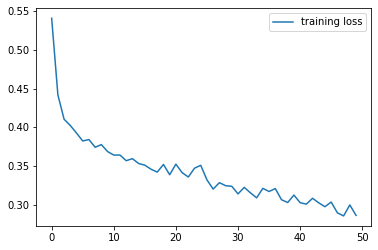

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='training loss')
plt.legend()

# Plotting the accuracy per epochs

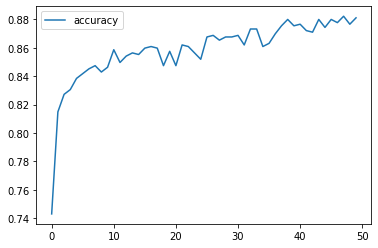

In [14]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

# Predicting the test set

In [15]:
predictions = model.predict(x_test).round().flatten()
x_test_ids = x_test_ids.flatten()
print(predictions)


[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

In [16]:
df = pd.DataFrame({'PassengerId':x_test_ids, 'Survived':predictions.astype(int)})
df.to_csv('Titanic-Submission-V.1.csv', index=False)
print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
